In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree,export_graphviz
import graphviz as gp

# Data

In [2]:
master=pd.read_csv('master_dup_removed.csv')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29


In [3]:
master.shape

(1362, 136)

# Clustering

In [4]:
y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35,48.0,39,44,37
1,27,34.0,48,53,40
2,35,38.0,37,40,43
3,29,41.0,48,47,41
4,26,45.0,38,35,40
...,...,...,...,...,...
1357,40,32.0,38,39,47
1358,28,40.0,34,41,48
1359,27,45.0,41,44,46
1360,35,41.0,45,32,44


In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
y=pd.DataFrame(imputer.fit_transform(y),columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35.0,48.0,39.0,44.0,37.0
1,27.0,34.0,48.0,53.0,40.0
2,35.0,38.0,37.0,40.0,43.0
3,29.0,41.0,48.0,47.0,41.0
4,26.0,45.0,38.0,35.0,40.0
...,...,...,...,...,...
1357,40.0,32.0,38.0,39.0,47.0
1358,28.0,40.0,34.0,41.0,48.0
1359,27.0,45.0,41.0,44.0,46.0
1360,35.0,41.0,45.0,32.0,44.0


In [6]:
scaler = StandardScaler()
scaler.fit(y)
y = pd.DataFrame(scaler.transform(y), columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.443070,1.246413,-0.428631,0.283842,-0.662282
1,-0.756058,-0.837097,1.126315,1.848997,-0.182480
2,0.443070,-0.241809,-0.774175,-0.411782,0.297323
3,-0.456276,0.204658,1.126315,0.805561,-0.022546
4,-0.905949,0.799947,-0.601403,-1.281313,-0.182480
...,...,...,...,...,...
1357,1.192525,-1.134742,-0.601403,-0.585688,0.937059
1358,-0.606167,0.055836,-1.292490,-0.237876,1.096993
1359,-0.756058,0.799947,-0.083088,0.283842,0.777125
1360,0.443070,0.204658,0.607999,-1.803031,0.457257


In [7]:
clusters = KMeans(n_clusters=5)

In [8]:
clusters.fit(y)

KMeans(n_clusters=5)

In [9]:
clusters.fit_transform(y)

array([[2.2636357 , 2.18552853, 1.90710257, 1.59522674, 2.77278972],
       [2.94070625, 2.20778859, 3.42189338, 2.32116103, 3.19992647],
       [1.01021323, 2.22945804, 1.37491982, 2.44530298, 1.58631159],
       ...,
       [2.06186474, 0.78216166, 2.42251832, 1.71770352, 2.63290474],
       [2.9600612 , 2.76264924, 1.72710829, 2.9075083 , 1.69928249],
       [1.50181847, 1.52347292, 1.85796338, 1.45601012, 2.08631059]])

In [10]:
centers=pd.DataFrame(scaler.inverse_transform(clusters.cluster_centers_),columns=y.columns)
centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,33.383803,35.563380,34.697183,44.693662,43.475352
1,28.236842,43.736842,44.481203,46.409774,46.428571
2,33.471380,38.814815,40.289562,36.606061,36.289562
3,26.993031,44.662021,44.184669,44.867596,35.874564
4,39.315789,34.600877,44.578947,39.114035,45.013158


In [11]:
clusters.labels_

array([3, 1, 0, ..., 1, 4, 3], dtype=int32)

In [12]:
target_label=clusters.labels_

In [13]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,0
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,1
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,0
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,1
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,4


In [14]:
master.target.value_counts()

2    297
3    287
0    284
1    266
4    228
Name: target, dtype: int64

In [15]:
gaussian_clusters=gm = GaussianMixture(n_components=5, random_state=0)

In [16]:
gaussian_clusters.fit(y)

GaussianMixture(n_components=5, random_state=0)

In [17]:
gaussian_clusters.means_

array([[ 0.36939452,  0.03377824,  0.70017181, -0.1186042 ,  0.47495203],
       [-0.0879497 , -0.42000532, -0.61562154,  0.46988289,  0.27763802],
       [-0.10964357,  0.12263497, -0.14701913, -0.57167953, -0.61590809],
       [-0.798865  ,  0.83230298,  0.53962362,  0.71891071, -0.06264678],
       [ 1.02353298, -0.71047431, -0.27873605, -0.74534831,  0.09162942]])

In [18]:
gaussian_centers=pd.DataFrame(scaler.inverse_transform(gaussian_clusters.means_),columns=y.columns)
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,34.508473,39.851787,45.533492,41.685840,44.110641
1,31.457295,36.802621,37.917704,45.069776,42.876921
2,31.312564,40.448853,40.629966,39.080553,37.289959
3,26.714415,45.217417,44.604242,46.501743,40.749266
4,38.872565,34.850835,39.867591,38.081918,41.713889


In [19]:
gaussian_target=gaussian_clusters.predict(y)

In [20]:
master['gaussian_target']=gaussian_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,3,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,1,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,0,1
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,1,3
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,4,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,0,1
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,1,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,4,2


In [ ]:
# Random Forest

## Data - X  and y

In [21]:
df = master.copy()

In [22]:
df.dropna(inplace=True)

In [23]:
X = df.drop(columns=["participant_id","NEO_N","NEO_E","NEO_O","NEO_A","NEO_O","NEO_C","target","gaussian_target"])

In [24]:
y = df["gaussian_target"]

## Data pre-processing

In [25]:
X['sex'].replace('F','female',inplace=True)

In [26]:
X['sex'].replace('M','male',inplace=True)

In [27]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65


In [28]:
X["sex"].unique()

array(['female', 'male'], dtype=object)

In [29]:
X["handedness"].unique()

array(['right', 'ambidextrous', 'left'], dtype=object)

In [30]:
X["education_category"].unique()

array(['applied', 'academic', 'medium', 'high', 'low'], dtype=object)

In [31]:
X.shape

(1352, 130)

In [32]:
X["sex"].unique()

array(['female', 'male'], dtype=object)

In [33]:
#Encoding SEX 
X["sex_enc"] = X['sex'].replace('female',0)

In [34]:
X["sex_enc"].replace("male",1,inplace=True)

In [35]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,sex_enc
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,954.7,431722.3085,412508.1558,52096,579143.3085,1.104817,12,15,27,0
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,1007.6,551229.5244,511140.9554,61775,729961.5244,0.946018,12,3,15,0
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,875.2,484203.7432,488806.8270,55089,666343.7432,1.121519,7,8,15,1
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,952.1,490562.7749,424675.0400,57767,666421.7749,1.046196,14,9,23,0
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,941.4,549885.2510,473013.9161,60987,723713.2510,0.981137,17,12,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,887.2,517851.7456,517310.5024,66447,711842.7456,0.921517,19,23,42,1
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,853.7,519398.3571,565436.6994,65260,718521.3571,0.933091,20,34,54,1
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,1128.7,567440.1256,469283.5790,61988,756582.1256,0.881901,20,33,53,1
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,1005.8,441752.2678,442438.1987,55159,595460.2678,1.003723,31,34,65,0


In [36]:
#Encoding Handedness
enc = OneHotEncoder(sparse = False)
enc.fit(X[["handedness"]])
hand_enc = enc.transform(X[["handedness"]])
X["right"],X["left"],X["ambidextrous"] = hand_enc.T

In [37]:
#Encoding Education
enc = OneHotEncoder(sparse = False)
enc.fit(X[["education_category"]])
ed_enc = enc.transform(X[["education_category"]])
X["applied"],X["academic"],X["medium"],X["high"],X["low"] = ed_enc.T

In [38]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X.drop(columns=["sex","handedness","education_category"], inplace = True)

## Model - Random Forest - Gaussian target

### Model data

In [40]:
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
y

0       3
1       1
2       1
3       3
4       2
       ..
1357    4
1358    1
1359    3
1360    2
1361    1
Name: gaussian_target, Length: 1352, dtype: int64

### Baseline model

In [42]:
master.target.value_counts()/len(X)

2    0.219675
3    0.212278
0    0.210059
1    0.196746
4    0.168639
Name: target, dtype: float64

In [43]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=136)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.33481153 0.34146341 0.27333333]


In [44]:
#model 2
forest = RandomForestClassifier(n_estimators=200,max_depth =5,n_jobs=-1,max_features=136)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.32594235 0.33924612 0.30222222]


In [45]:
#model 3
forest = RandomForestClassifier(n_estimators=200,n_jobs=-1, max_depth = 5, max_features = 136)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.32594235 0.35033259 0.29333333]


In [46]:
forest.fit(X,y)

RandomForestClassifier(max_depth=5, max_features=136, n_estimators=200,
                       n_jobs=-1)

In [47]:
df_features_import = pd.DataFrame(forest.feature_importances_)

In [48]:
df_features_import.index=X.columns

In [49]:
df_features_import.sort_values(0,ascending=False)

,0
Left-Accumbens-area,0.121735
Optic-Chiasm,0.031241
rh_superiorfrontal_thickness,0.019933
rh_medialorbitofrontal_thickness,0.019664
SurfaceHoles,0.017409
...,...
Right-WM-hypointensities,0.000000
non-WM-hypointensities,0.000000
Right-non-WM-hypointensities,0.000000
Left-non-WM-hypointensities,0.000000


In [50]:
len(forest.estimators_)

200

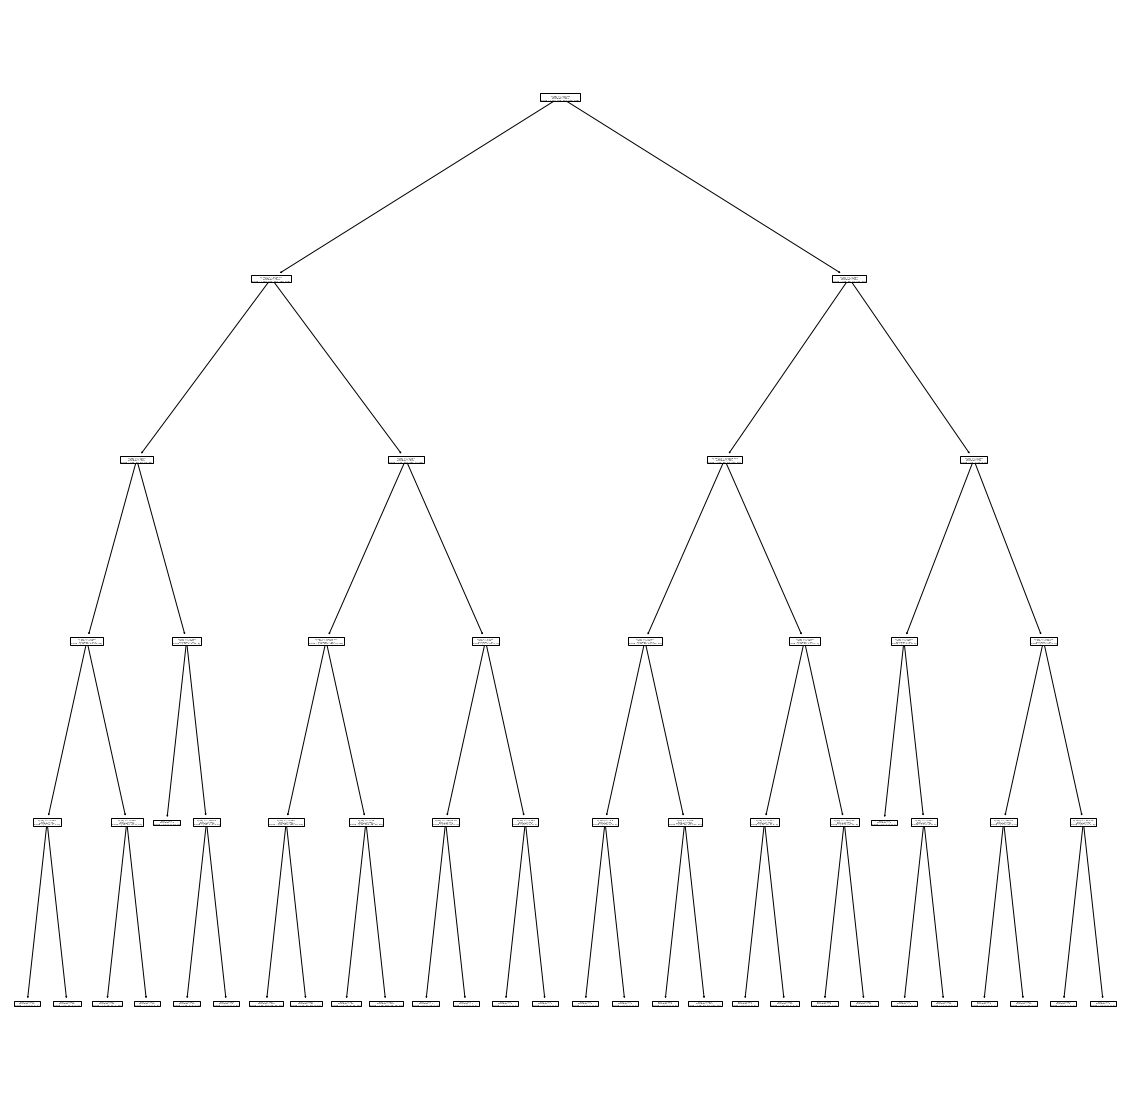

In [52]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plot_tree(forest.estimators_[20],ax=ax);

In [ ]:
#!pip install graphviz

In [ ]:
#tree_file = export_graphviz(forest.estimators_[20],out_file="tree.dot")

In [ ]:
#gp.Source(tree_file,filename ="tree.dot",format="png")

### Grid Search - optimizing the model

In [53]:
#Parameters to tune

#number of trees in the foreset
#n_estimators = [100,150,200]
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
#Maximum number of features per tree
max_features = [15,20,25,30,50,100]

#Create the random grid

grid={
    #"n_estimators": n_estimators,
    "max_depth": max_depth,
    "max_features": max_features
}

print(grid)

{'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': [15, 20, 25, 30, 50, 100]}


In [54]:
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model,param_grid= grid,cv= 3,n_jobs=-1)

In [55]:
#fit the grid data
grid_search.fit(X, y)

#calculate the best parameters
grid_search.best_params_

{'max_depth': 30, 'max_features': 100}

In [56]:
forest = RandomForestClassifier(n_jobs=-1, max_depth = 30, max_features = 100)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.33924612 0.34368071 0.28888889]


## Model - Random Forest - Kmeans target

### Data & preprocessing

In [57]:
df = master.copy()

In [58]:
df.dropna(inplace=True)

In [59]:
X = df.drop(columns=["participant_id","NEO_N","NEO_E","NEO_O","NEO_A","NEO_O","NEO_C","target","gaussian_target"])

In [60]:
y = df["target"]

In [61]:
X['sex'].replace('F','female',inplace=True)

In [62]:
X['sex'].replace('M','male',inplace=True)

In [63]:
X["sex_enc"] = X['sex'].replace('female',0)

In [64]:
X["sex_enc"].replace("male",1,inplace=True)

In [65]:
#Encoding Handedness
enc = OneHotEncoder(sparse = False)
enc.fit(X[["handedness"]])
hand_enc = enc.transform(X[["handedness"]])
X["right"],X["left"],X["ambidextrous"] = hand_enc.T

In [66]:
#Encoding Education
enc = OneHotEncoder(sparse = False)
enc.fit(X[["education_category"]])
ed_enc = enc.transform(X[["education_category"]])
X["applied"],X["academic"],X["medium"],X["high"],X["low"] = ed_enc.T

In [67]:
X.drop(columns=["sex","handedness","education_category"], inplace = True)

### Baseline model

In [68]:
master.target.value_counts()/len(X)

2    0.219675
3    0.212278
0    0.210059
1    0.196746
4    0.168639
Name: target, dtype: float64

### Grid Search - optimizing the model

In [69]:
#Parameters to tune

# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
#Maximum number of features per tree
max_features = [15,20,25,30,50,100]

#Create the random grid

grid={
    #"n_estimators": n_estimators,
    "max_depth": max_depth,
    "max_features": max_features
}

print(grid)

{'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': [15, 20, 25, 30, 50, 100]}


In [70]:
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model,param_grid= grid,cv= 3,n_jobs=-1)

In [71]:
#fit the grid data
grid_search.fit(X, y)

#calculate the best parameters
grid_search.best_params_

{'max_depth': 5, 'max_features': 15}

In [72]:
forest = RandomForestClassifier(n_jobs=-1, max_depth = 5, max_features = 15)
cv_results = cross_validate(forest, X, y, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.31263858 0.28824834 0.26222222]


# Random Forest Individual targets

## Data and preprocessing

In [73]:
df = master.copy()

In [74]:
df.dropna(inplace=True)

In [75]:
df['sex'].replace('F','female',inplace=True)

In [76]:
df['sex'].replace('M','male',inplace=True)

In [77]:
df["sex_enc"] = df['sex'].replace('female',0)

In [78]:
df["sex_enc"].replace("male",1,inplace=True)

In [79]:
#Encoding Handedness
enc = OneHotEncoder(sparse = False)
enc.fit(df[["handedness"]])
hand_enc = enc.transform(df[["handedness"]])
df["right"],df["left"],df["ambidextrous"] = hand_enc.T

In [80]:
#Encoding Education
enc = OneHotEncoder(sparse = False)
enc.fit(df[["education_category"]])
ed_enc = enc.transform(df[["education_category"]])
df["applied"],df["academic"],df["medium"],df["high"],df["low"] = ed_enc.T

In [81]:
df

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,gaussian_target,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,sub-0001,26.25,female,24.0,right,applied,35,44,37,39,...,3,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,sub-0002,21.00,female,23.0,right,academic,27,53,40,48,...,1,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,sub-0003,23.00,male,22.0,right,academic,35,40,43,37,...,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,sub-0004,23.50,female,22.0,right,applied,29,47,41,48,...,3,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,sub-0005,21.75,male,19.0,ambidextrous,applied,26,35,40,38,...,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,3,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [82]:
X = df.drop(columns=["participant_id","NEO_N","NEO_E","NEO_O","NEO_A","NEO_O","NEO_C","target","gaussian_target","sex","handedness","education_category"])

In [83]:
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [84]:
# Discretizing target: 0 = lower, 1 = higher
y_disc = df.iloc[:,6:11]
y = []
for i in range(5):
    y.append(pd.cut(x= y_disc.iloc[:,i], 
                    bins= [y_disc.iloc[:,i].min()-1, y_disc.iloc[:,i].mean(), y_disc.iloc[:,i].max()+1], 
                    labels= [0, 1]))
y = pd.DataFrame(y[0:5]).T
y.head()

,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,1,1,0,0,1
1,0,1,0,1,0
2,1,0,1,0,0
3,0,1,0,1,1
4,0,0,0,0,1


## y = NEO_N

In [85]:
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [86]:
y_n = y["NEO_N"]
y_n

0       1
1       0
2       1
3       0
4       0
       ..
1357    1
1358    0
1359    0
1360    1
1361    0
Name: NEO_N, Length: 1352, dtype: int64

In [87]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y_n, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.57649667 0.59423503 0.54888889]


## y = NEO_E

In [88]:
X

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,SurfaceHoles,sex_enc,right,left,ambidextrous,applied,academic,medium,high,low
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,27,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,15,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,15,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,23,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,29,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,42,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,54,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,53,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,65,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [89]:
y_e = y["NEO_E"]
y_e

0       1
1       1
2       0
3       1
4       0
       ..
1357    0
1358    0
1359    1
1360    0
1361    1
Name: NEO_E, Length: 1352, dtype: int64

In [90]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y_e, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.58980044 0.52771619 0.48888889]


## y = NEO_O

In [91]:
y_o = y["NEO_O"]
y_o

0       0
1       0
2       1
3       0
4       0
       ..
1357    1
1358    1
1359    1
1360    1
1361    0
Name: NEO_O, Length: 1352, dtype: int64

In [92]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y_o, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.55654102 0.54101996 0.52      ]


## y = NEO_A

In [93]:
y_a = y["NEO_A"]
y_a

0       0
1       1
2       0
3       1
4       0
       ..
1357    0
1358    0
1359    0
1360    1
1361    1
Name: NEO_A, Length: 1352, dtype: int64

In [94]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y_a, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.64301552 0.62305987 0.53111111]


## y = NEO_C

In [95]:
y_c = y["NEO_C"]
y_c

0       1
1       0
2       0
3       1
4       1
       ..
1357    0
1358    1
1359    1
1360    1
1361    0
Name: NEO_C, Length: 1352, dtype: int64

In [96]:
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1)
cv_results = cross_validate(forest, X, y_c, scoring = "accuracy", cv=3)
print(cv_results['test_score'])

[0.68736142 0.66075388 0.50444444]
